In [1]:
import pandas as pd
import numpy as np
from acquire import read_or_write_csv, acquire_store
from prepare import prep_ops, prep_store
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Exercises

## Store Data

In [25]:
store = prep_store()

In [26]:
store.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,1,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,30.16
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,1,308.48
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,197.55
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,1,25.16


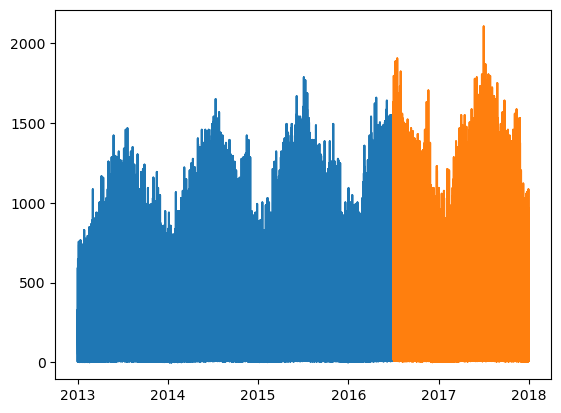

In [27]:
train_size = .70
n = store.shape[0]
test_start_index = round(train_size * n)

train = store[:test_start_index] # everything up (not including) to the test_start_index
test = store[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

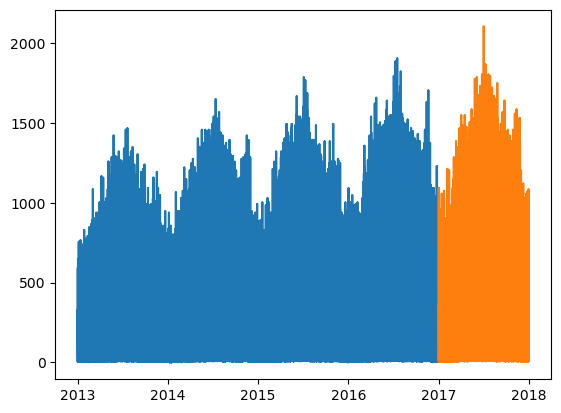

In [28]:
train = store.loc[:'2016']
test = store.loc['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [29]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01     30.16
2013-01-01    308.48
2013-01-01    197.55
2013-01-01     25.16
Name: sales_total, dtype: float64

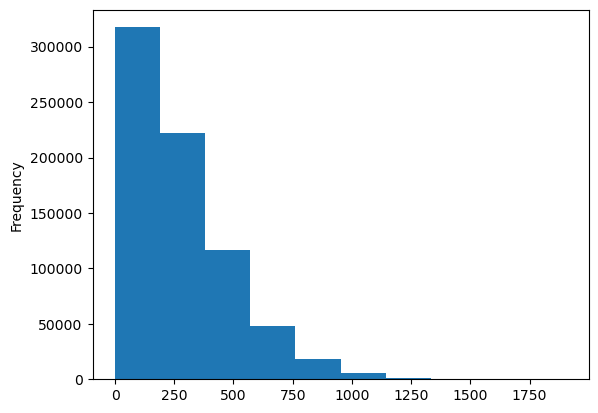

In [30]:
y.plot.hist()
plt.show()

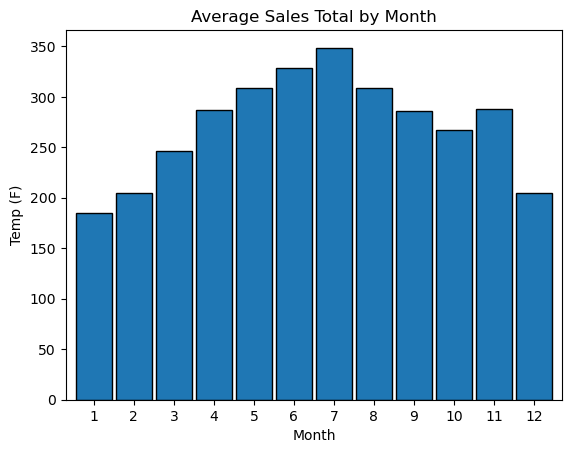

In [31]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='Temp (F)')
plt.show()

<Axes: xlabel='sale_date'>

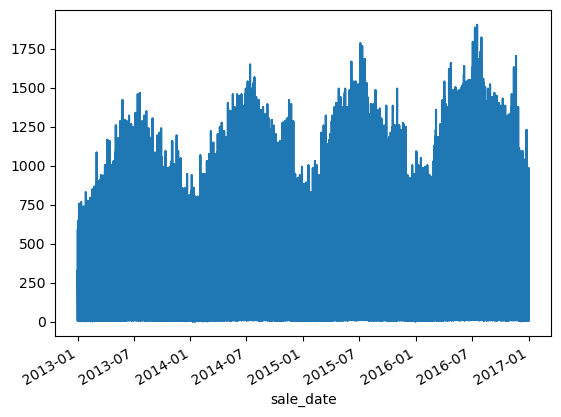

In [32]:
y.plot()

<Axes: title={'center': 'Daily Average'}, xlabel='sale_date'>

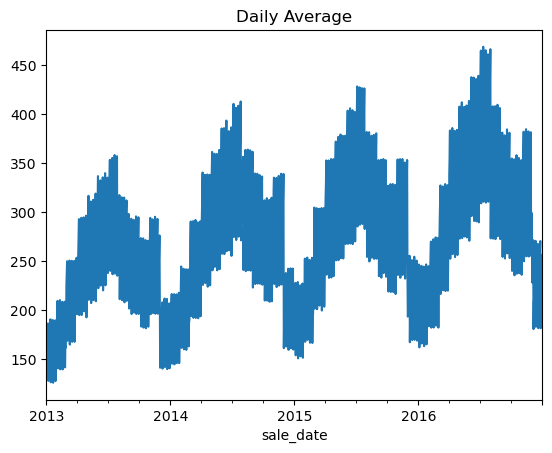

In [33]:
y.resample('D').mean().plot(title='Daily Average')

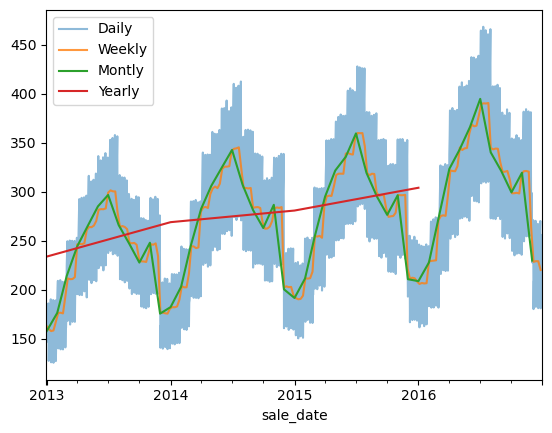

In [35]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

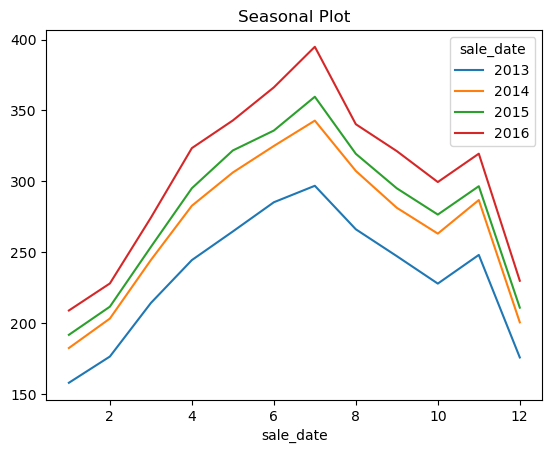

In [37]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

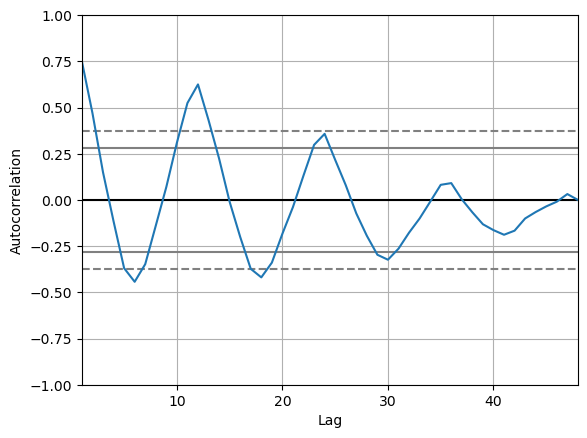

In [43]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('M').mean())
plt.show()

## OPSD Data

In [45]:
ops = prep_ops()

In [46]:
ops.head()

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


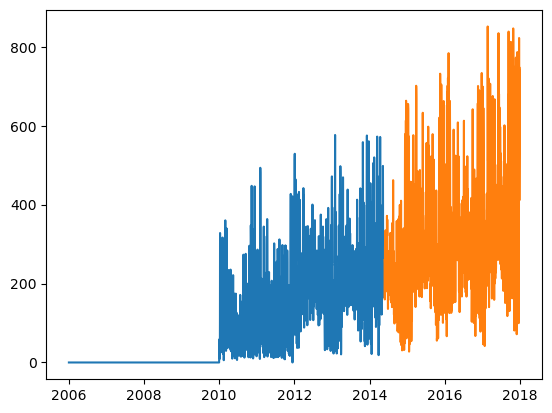

In [47]:
train_size = .70
n = ops.shape[0]
test_start_index = round(train_size * n)

train = ops[:test_start_index] # everything up (not including) to the test_start_index
test = ops[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)

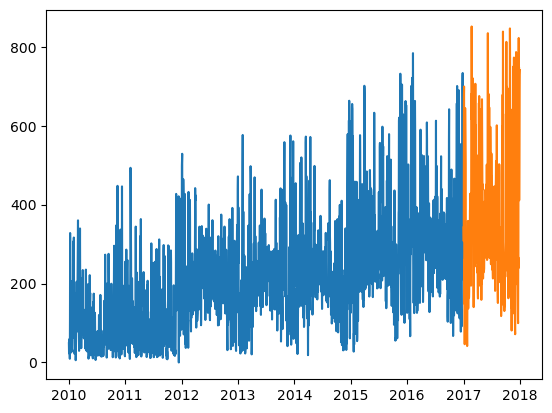

In [48]:
train = ops.loc['2010':'2016']
test = ops.loc['2017']

plt.plot(train.index, train.wind_and_solar)
plt.plot(test.index, test.wind_and_solar)

In [49]:
y = train.wind_and_solar
y.head()

date
2010-01-01    48.709
2010-01-02    24.628
2010-01-03    22.963
2010-01-04    59.318
2010-01-05    41.624
Name: wind_and_solar, dtype: float64

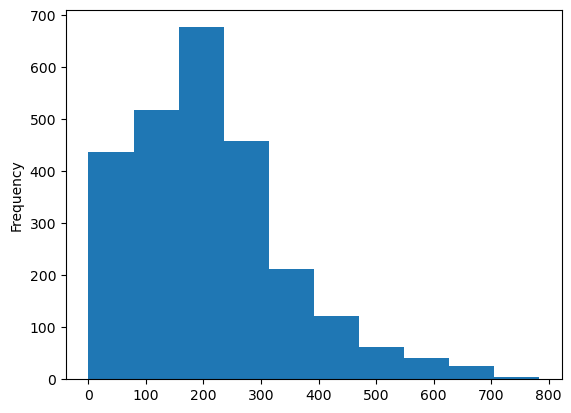

In [50]:
y.plot.hist()
plt.show()

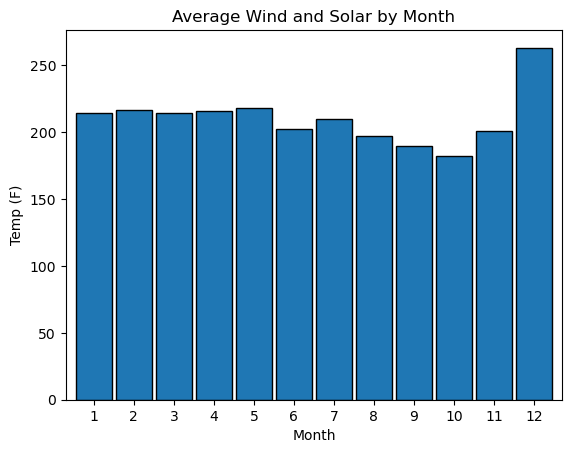

In [51]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind and Solar by Month', xlabel='Month', ylabel='Temp (F)')
plt.show()

<Axes: xlabel='date'>

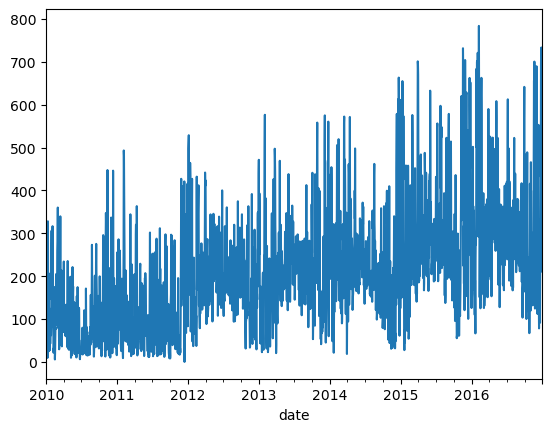

In [52]:
y.plot()

<Axes: title={'center': 'Daily Average'}, xlabel='date'>

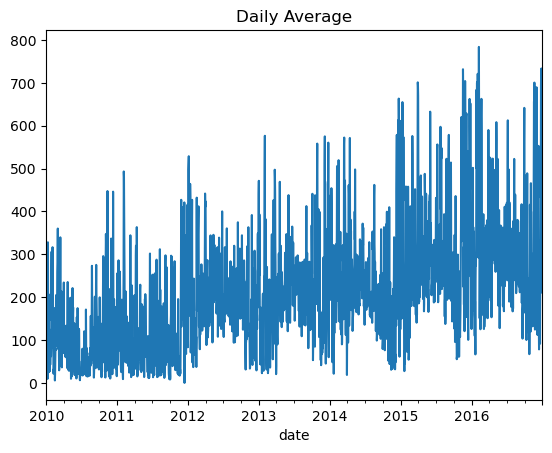

In [53]:
y.resample('D').mean().plot(title='Daily Average')

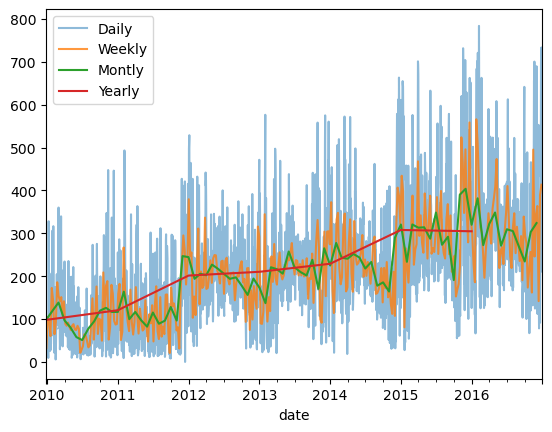

In [54]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

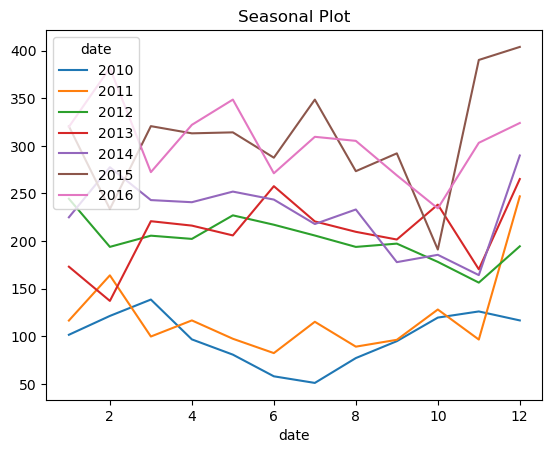

In [55]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.show()

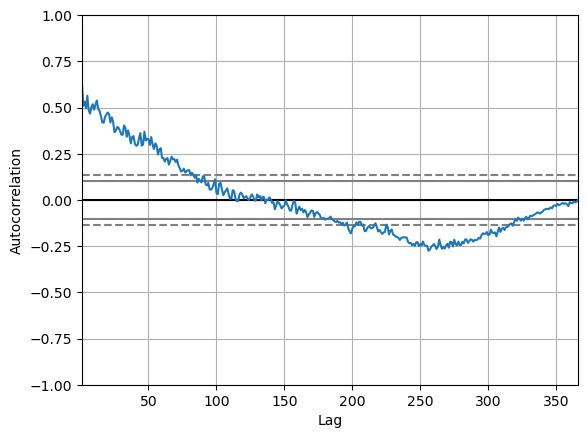

In [60]:
pd.plotting.autocorrelation_plot(train.wind_and_solar.resample('W').mean())
plt.show()

In [ ]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())